# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1434]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1435]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [1436]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [1437]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [1438]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.8 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [1439]:
# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Method for data scaling
from sklearn.preprocessing import StandardScaler

'''
In this method we
1) Encode categorial values of targets.
2) Remove unnesessary 1st colomn with feature "0", cause it's just represent index of object in dataframe.
3) Scale features values.
'''
def PrepareRawData(raw_dataset):
    # As we can see, target colomn is a categorial, so, we need to represent it as number.
    # Also, we should to scale dataset and remove the first colomn, 
    # cause it's just an index of element, it doesn't include any information about objects.

    # Creating a instance of label Encoder.
    le = LabelEncoder()    
    # Using .fit_transform function to fit label encoder and return encoded label
    label = le.fit_transform(raw_dataset['van'])

    raw_dataset.drop("van", axis=1, inplace=True)
    raw_dataset["van"] = label

    # Drop the first colomn (represent index)
    raw_dataset.drop("0", axis=1, inplace=True)

    # Check if all data in datdaset have one type
    assert (len(set(raw_dataset.dtypes[:-1])) == 1)

    # Нормализуем данные
    df = raw_dataset.values
    data = df[:, :-1].astype(int) # матрица объект-признак
    target = df[:, -1] # вектор меток класса
    scaler = StandardScaler().fit(data)
    data = scaler.transform(data)

    # Some explanation what do we do here.
    # We have done some actions with mmatrix data, now we build a new dataframe with this data.
    # We use indexes [:-1] with raw_dataset.columns, cause we will add target colomn by separate instruction.
    new_data_frame = pd.DataFrame(data=data, columns= list(raw_dataset.columns[:-1]))
    new_data_frame['target'] = target
    return new_data_frame

In [1440]:
raw_dataset = pd.read_csv('car_data.csv')
raw_dataset

,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
0,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
1,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
2,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
3,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
4,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
841,842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
842,843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
843,844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [1441]:
# Note, that python pass function parametrs by reference by default.
# In our case it's better to pass it by value (copy value by hand).
df = PrepareRawData(raw_dataset.copy())
df

,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,target
0,-0.325092,-0.625391,0.121258,-0.834466,-0.594099,0.094398,-0.597018,0.520703,-0.610878,-0.343594,-0.593793,-0.622500,-0.512901,-0.062124,0.533206,0.157297,0.010560,0.452936,3
1,1.253660,0.833535,1.516179,1.197160,0.547994,0.311744,1.147651,-1.143516,0.932296,0.690125,1.094545,1.103783,1.392159,0.071450,1.549810,-0.402584,-0.151683,0.049637,2
2,-0.082207,-0.625391,-0.005553,-0.296682,0.167297,0.094398,-0.747420,0.648720,-0.610878,-0.343594,-0.912347,-0.741359,-1.465430,-1.264289,-0.076757,-0.290608,1.632991,1.528400,3
3,-1.053747,-0.139082,-0.766419,1.077653,5.243265,9.440289,-0.597018,0.520703,-0.610878,-0.274680,1.667942,-0.650800,0.408902,7.284439,0.533206,-0.178632,-1.449628,-1.697992,0
4,1.617988,1.968256,1.516179,0.091717,-1.482393,-0.557641,2.591514,-1.911617,2.861263,1.448185,2.910304,2.926285,2.744136,1.674337,-0.280077,-0.402584,-1.287385,-1.697992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,-0.082207,-0.949597,0.311475,0.420362,0.294196,-0.122949,0.004592,-0.119381,-0.225084,-0.963826,0.361870,-0.101785,-0.789441,-0.062124,0.126564,1.389034,-0.151683,-0.084796,2
841,-0.567977,0.185123,0.121258,-0.177175,0.547994,0.529090,-0.296213,0.264669,-0.225084,0.759039,-0.498226,-0.407422,0.040181,-0.062124,-1.093361,0.829154,-0.476169,0.184070,3
842,1.496545,1.481947,1.199152,1.585559,0.674894,0.746437,1.598858,-1.399550,1.703883,1.723844,1.253822,1.590538,0.777624,-0.329271,-0.686719,-0.962465,-0.313926,0.721802,2
843,-0.932305,-1.435906,-0.259175,-0.685081,-0.467199,-0.340295,-1.018144,1.160787,-0.996671,-1.652972,-1.071624,-0.962097,-0.820168,-0.863567,-1.296681,1.389034,0.172803,-0.084796,2


In [1442]:
def count_correlationn(df):
    correlation_matrix = df.corr().abs()
    threshold = 0.9
    correlated_features = np.where(correlation_matrix > threshold)
    arr = []

    for feature_a, feature_b in zip(*correlated_features):
        if feature_a != feature_b and feature_a < feature_b:
            arr.append([df.columns[feature_a], df.columns[feature_b]])
    return arr

In [1443]:
# Check if we have correlated features in dataset
arr = count_correlationn(df)
for i in range(len(arr)):
    print(arr[i])

['48', '159']
['48', '184']
['83', '162']
['83', '42']
['162', '42']
['162', '20']
['162', '176']
['162', '379']
['42', '20']
['42', '176']
['42', '379']
['20', '176']
['20', '379']
['176', '379']


<AxesSubplot:>

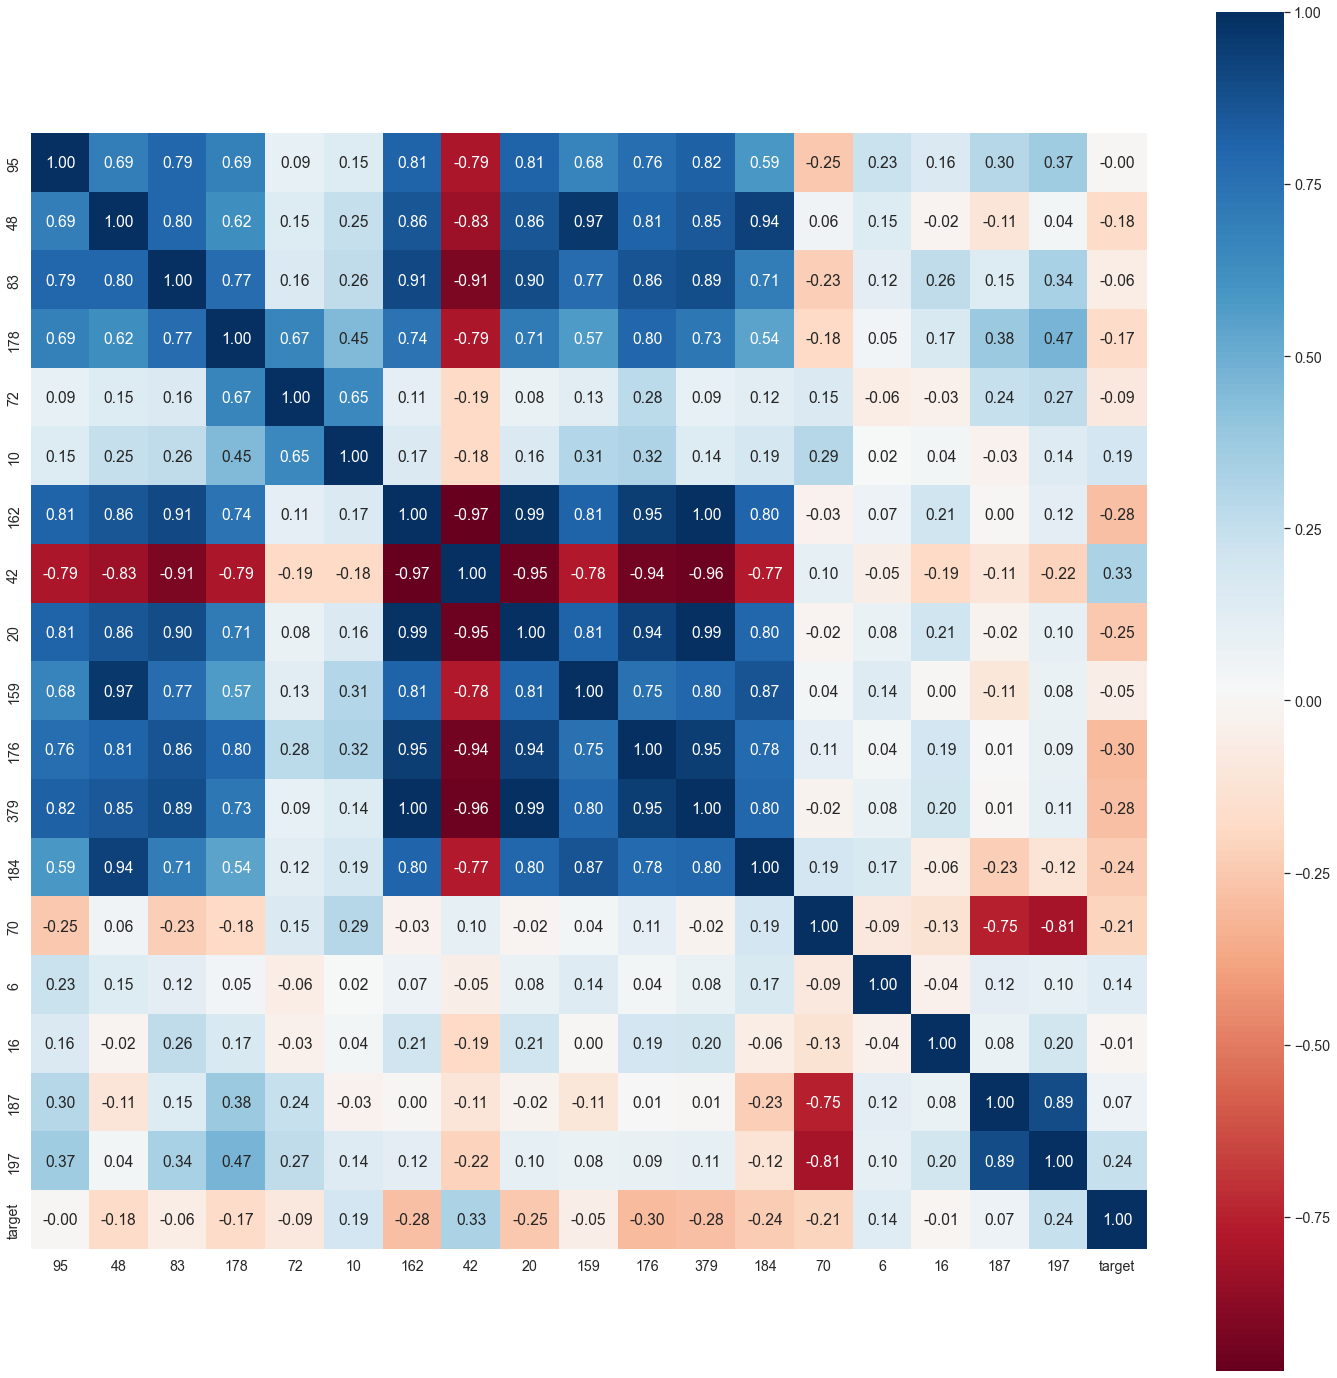

In [1444]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# As we can see, it's excist correlated features in dataset. Check out correlation matrix,
sns.set(font_scale=1.3)
plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(),
            square=True,
            annot=True,
            fmt=".2f",
            cmap="RdBu")

In [1445]:
# Remove some of correlated features
df.drop("42", axis=1, inplace=True)
df.drop("162", axis=1, inplace=True)
df.drop("20", axis=1, inplace=True)

<AxesSubplot:>

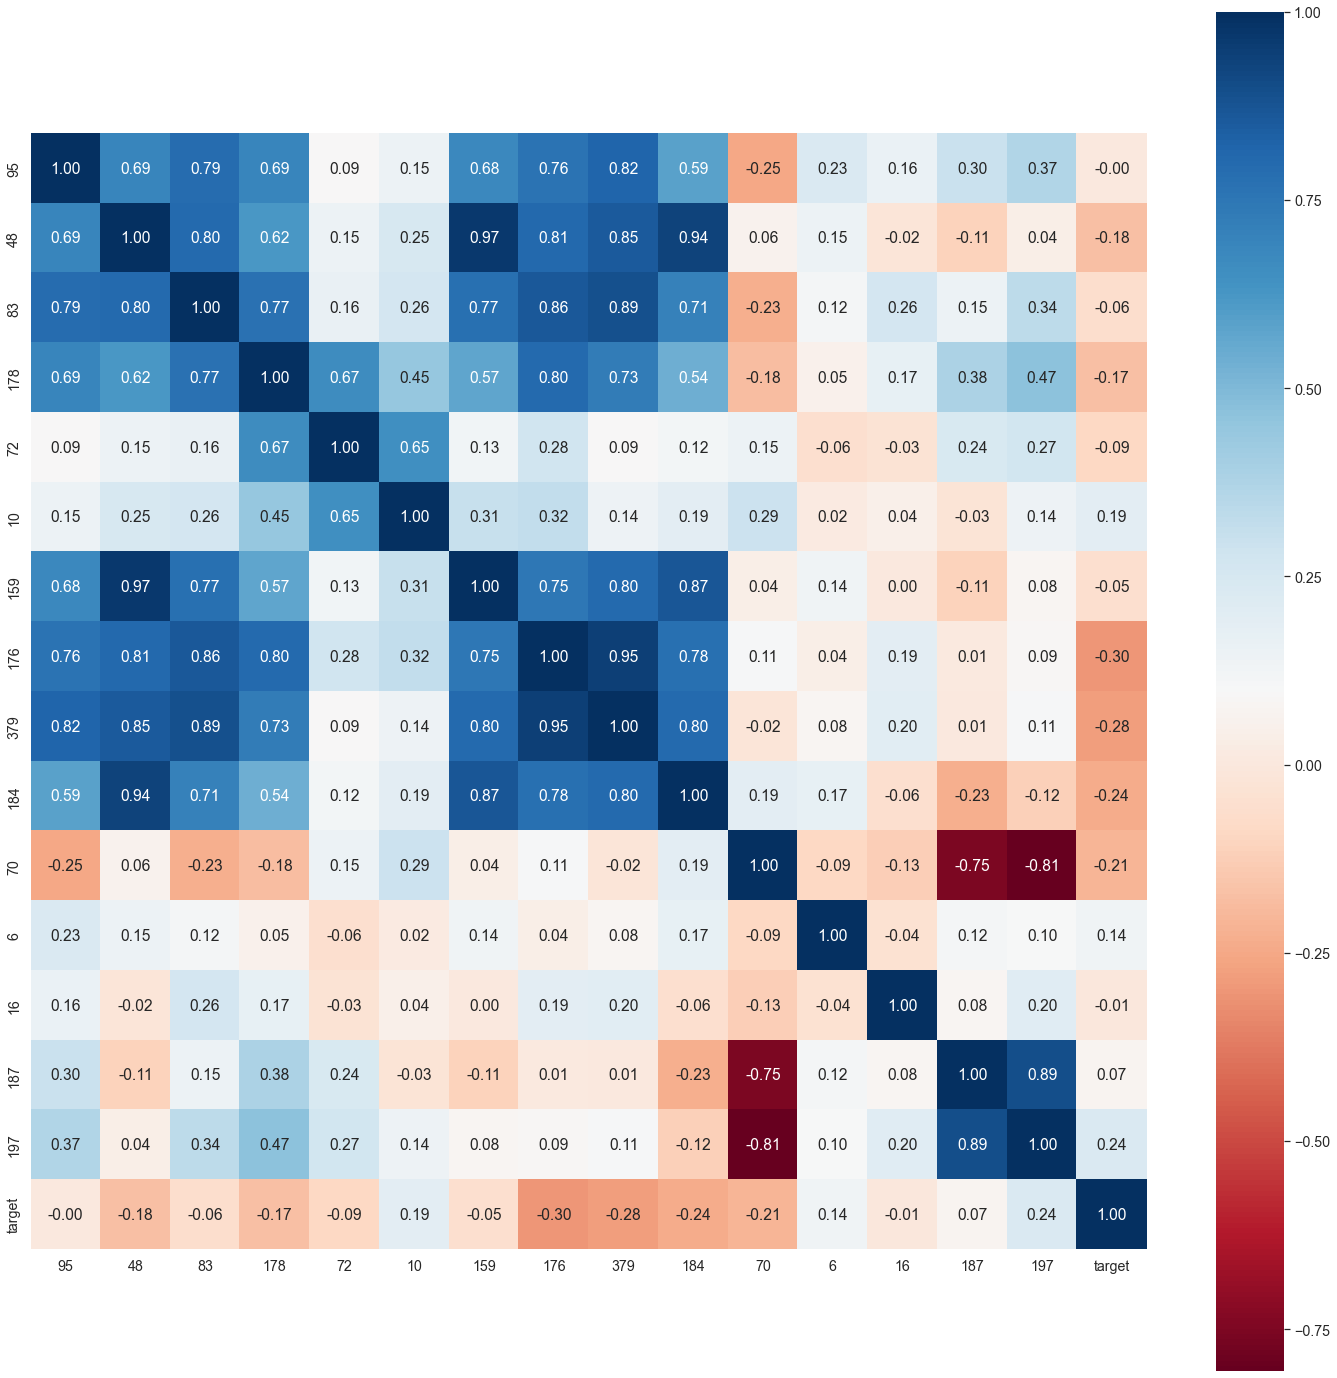

In [1446]:
sns.set(font_scale=1.3)
plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(),
            square=True,
            annot=True,
            fmt=".2f",
            cmap="RdBu")

In [1447]:
df_values = df.values
data = df_values[:, :-1] # матрица объект-признак
target = df_values[:, -1] # вектор меток класса

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=90)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 15) (549,) (296, 15) (296,)


В этой части мы произвели препроцессинг данных (обработали данные для дальнейней работы с ними).

В первую очередь, мы увидели, что метки классов являются категоримальными признаками, поэтому, мы закодировали их, по-сути, транслировали категориальные метки в числа.

Первый столбец фичей есть ни что иное, как порядковый номер объекта в датасете. Поскольку мы считаем, что
все объекты в датасете равноправны (мы не работаем с данными, зависящими от времени), мы удаляем этот столбец, так как он не только не несет полезной информации об объекте, но даже наоборот -- будет путать нашу модель.

После этого мы нормировали данные.

Необязательной частью является исследование корреляции фичей. Я рассмотрел матрицу корреляции и удалил часть фичей, которые сильно коррелируют с другими признаками (корреляция по модулю больше 0.9). Заметим, что в ходе выполнения работы обнаружилось, что это положительно влияет при применении обычной логистической регрессии (оценка на тестовых данных растет), но негативно влияет при применении PCA, поэтому перед применением PCA мы вернем удаленные фичи на место.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [1448]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

def train_model(model, param, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param)
    grid_search.fit(X_train, y_train)

    print(model)
    print("tuned param :(best parameters) ", grid_search.best_params_)

    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred)) 
    print("Test score", grid_search.score(X_test, y_test))  

In [1449]:
# Lets find best hyperparametrs by usin grid search
parameters_for_logreg = {"C" : np.logspace(-3, 3, 7), "penalty":["l1", "l2"]}
logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42)

train_model(logreg, parameters_for_logreg, X_train, y_train, X_test, y_test)

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42,
                   solver='saga', tol=0.001)
tuned param :(best parameters)  {'C': 100.0, 'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        76
         1.0       0.71      0.77      0.74        73
         2.0       0.74      0.67      0.70        79
         3.0       0.94      0.96      0.95        68

    accuracy                           0.83       296
   macro avg       0.83      0.84      0.83       296
weighted avg       0.83      0.83      0.83       296

Test score 0.831081081081081


In [1450]:
# build a model with best parametrs
logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42,
                            C = 100,
                            penalty='l1')

logreg_clf = logreg.fit(X_train, y_train)

# Checkout cross-validation score on train set
print(f"cross-validation score is {cross_val_score(logreg_clf, X_train, y_train, cv=10, scoring='accuracy').mean()}")

cross-validation score is 0.7942424242424242


In [1451]:
# Checkout accuracy and f1
logreg_prediction = logreg_clf.predict(X_test)

print(f"accuracy score is {accuracy_score(y_test, logreg_prediction)}")
print(f"f1 score is {f1_score(y_test, logreg_prediction, average='macro')}")

accuracy score is 0.831081081081081
f1 score is 0.833775597692932


In [1452]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

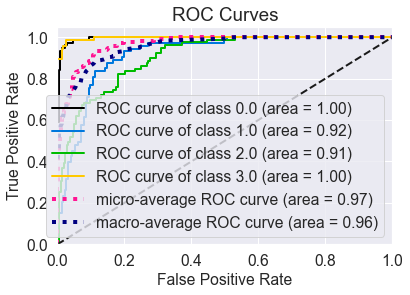

In [1453]:
from scikitplot import metrics

logreg_prediction_propabilities = logreg_clf.predict_proba(X_test)
metrics.plot_roc(y_test, logreg_prediction_propabilities)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

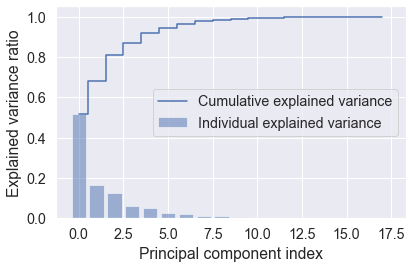

'\nВ соответсвии с графиком, делаем вывод, что оптимаьлно брать первые 8-9 компонент, т. к. по ним\nесть хоть сколько-нибудь заметный прирост дисперсии.\n'

In [1454]:
### YOUR CODE HERE
from sklearn import decomposition

'''
В этой части кода, мы рассматриваем основные направления и изучаем какая дисперсия данных будет
при проекции на каждую из компонент. Bar график показывает величину дисперсии при проекции 
на отдельную компоненту. Столбчатый график показывает суммарную дисперсию при использовании 
первых k компонент. Наша задача -- получить максимальную дисперсию при проекции.
'''

'''
Now we make a data preprocessing once again, cause in the first preprocession we have deleted some 
features. With usign PCA it can lead to the low score.
'''
df = PrepareRawData(raw_dataset.copy())
df_values = df.values
data = df_values[:, :-1] # матрица объект-признак
target = df_values[:, -1] # вектор меток класса

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=90)

# Instantiate PCA
pca = decomposition.PCA()
# Determine transformed features
X_train_pca = pca.fit_transform(X_train)
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

'''
В соответсвии с графиком, делаем вывод, что оптимаьлно брать первые 8-9 компонент, т. к. по ним
есть хоть сколько-нибудь заметный прирост дисперсии.
'''

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [1455]:
### YOUR CODE HERE
from sklearn import decomposition

# Make a PCA data decomposiotion
pca = decomposition.PCA(n_components=9)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

np.shape(X_train_pca), np.shape(X_test_pca)

((549, 9), (296, 9))

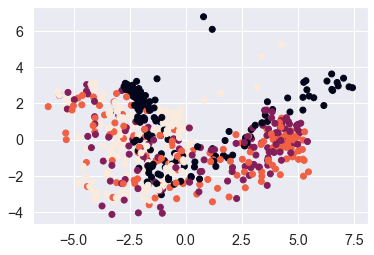

In [1456]:
# Here we can use PCA to try to visualise on data on plot
pca_for_plot = decomposition.PCA(n_components=2)
X_train_for_plot = pca_for_plot.fit_transform(X_train)
plt.scatter(X_train_for_plot[:, 0], X_train_for_plot[:, 1], c=y_train, alpha=1)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

В соответсвие с explaided variance plot я отобрал 9 признаков исходного датасета, так как исходя из графика, эти признаки все еще влияют на прирост дисперсии. Если бы мы взяли меньше признаков, мы бы потеряли информацию об объектах.

Рекомендуется нормализовать или стандартизировать данные перед проведением PCA, поскольку немасштабированные данные с разными единицами измерения могут манипулировать относительным сравнением дисперсии между функциями, а алгоритмы машинного обучения работают лучше, когда все функции находятся в одном масштабе.

При этом, PCA не гарантирует прирост качества модели, так как в любом случае, при уменьшении размерности мы теряем информацию об объектах, что и будет продемонстрировано далее (после применения PCA модели стали вести себя хуже).

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [1457]:
### YOUR CODE HERE

# Lets find best hyperparametrs by usin grid search on PCA data
parameters_for_logreg = {"C" : np.logspace(-3, 3, 7), "penalty":["l1", "l2"]}
logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42)

train_model(logreg, parameters_for_logreg, X_train_pca, y_train, X_test_pca, y_test)

logreg.fit(X_train_pca, y_train)
pred = logreg.predict(X_test_pca)
accuracy_score(y_test, pred)

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42,
                   solver='saga', tol=0.001)
tuned param :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.51      0.70      0.59        76
         1.0       0.51      0.40      0.45        73
         2.0       0.46      0.41      0.43        79
         3.0       0.79      0.76      0.78        68

    accuracy                           0.56       296
   macro avg       0.57      0.57      0.56       296
weighted avg       0.56      0.56      0.55       296

Test score 0.5608108108108109


0.5675675675675675

In [1458]:
# build a model with best parametrs
logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42,
                            C = 10,
                            penalty='l1')

logreg_clf = logreg.fit(X_train_pca, y_train)

# Checkout cross-validation score on train set
print(f"cross-validation score is {cross_val_score(logreg_clf, X_train_pca, y_train, cv=10, scoring='accuracy').mean()}")

cross-validation score is 0.6776430976430976


In [1459]:
# Checkout accuracy and f1
logreg_prediction = logreg_clf.predict(X_test_pca)

print(f"accuracy score is {accuracy_score(y_test, logreg_prediction)}")
print(f"f1 score is {f1_score(y_test, logreg_prediction, average='macro')}")

accuracy score is 0.5608108108108109
f1 score is 0.5608986426150605


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

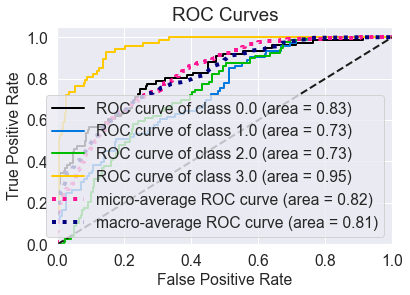

In [1460]:
logreg_prediction_propabilities = logreg_clf.predict_proba(X_test_pca)
metrics.plot_roc(y_test, logreg_prediction_propabilities)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [1461]:
from sklearn.tree import DecisionTreeClassifier

# Find best tree depth with cross-validation
tree_depth = np.arange(1, 15, 1)
cros_val_scores = []
for depth in tree_depth:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(clf, X_train_pca, y_train, cv=10, scoring='accuracy')
    cros_val_scores.append(scores.mean())

print(f"The max cross validation score is {np.max(cros_val_scores)} with the optimal depth is {tree_depth[np.argmax(cros_val_scores)]}")

The max cross validation score is 0.6264983164983164 with the optimal depth is 11


In [1462]:
# Build the decision tree with best max_depth and chack out f1 and accuracy
clf = DecisionTreeClassifier(max_depth=tree_depth[np.argmax(cros_val_scores)], random_state=0)
clf.fit(X_train_pca, y_train)
prediction = clf.predict(X_test_pca)

desision_tree_accuracy_score = accuracy_score(y_test, prediction)
desision_tree_f1_score = f1_score(y_test, prediction, average='micro')
print(f"accuracy score is {desision_tree_accuracy_score}")
print(f"f1 score is {desision_tree_f1_score}")

accuracy score is 0.5135135135135135
f1 score is 0.5135135135135135


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [1463]:
# # YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

# Variate BaggingClassifier with different amount of estimators and plot f1 and accuracy w.r.t. the size of esemble
N_estimators = np.arange(2, 100+1)

# firstly do bagging with DesisionTreeClassifier
tree_f1_score = []
tree_accuracy_score = []
for n in N_estimators:
    tree = DecisionTreeClassifier()
    clf = BaggingClassifier(tree, n_estimators=n, random_state=0, max_samples=X_train.shape[0])
    clf.fit(X_train_pca, y_train)
    prediction = clf.predict(X_test_pca)

    ensemble_tree_accuracy_score = accuracy_score(y_test, prediction)
    ensemble_tree_f1_score = f1_score(y_test, prediction, average='micro')

    tree_f1_score.append(ensemble_tree_f1_score)
    tree_accuracy_score.append(ensemble_tree_accuracy_score)

# secondly do bagging with LogisticRegression
logreg_f1_score = []
logreg_accuracy_score = []
for n in N_estimators:
    logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42)
    
    clf = BaggingClassifier(logreg, n_estimators=n, random_state=0, max_samples=X_train.shape[0])
    clf.fit(X_train_pca, y_train)
    prediction = clf.predict(X_test_pca)

    ensemble_lr_accuracy_score = accuracy_score(y_test, prediction)
    ensemble_lr_f1_score = f1_score(y_test, prediction, average='micro')

    logreg_f1_score.append(ensemble_lr_f1_score)
    logreg_accuracy_score.append(ensemble_lr_accuracy_score)

c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: C

Text(0, 0.5, 'score')

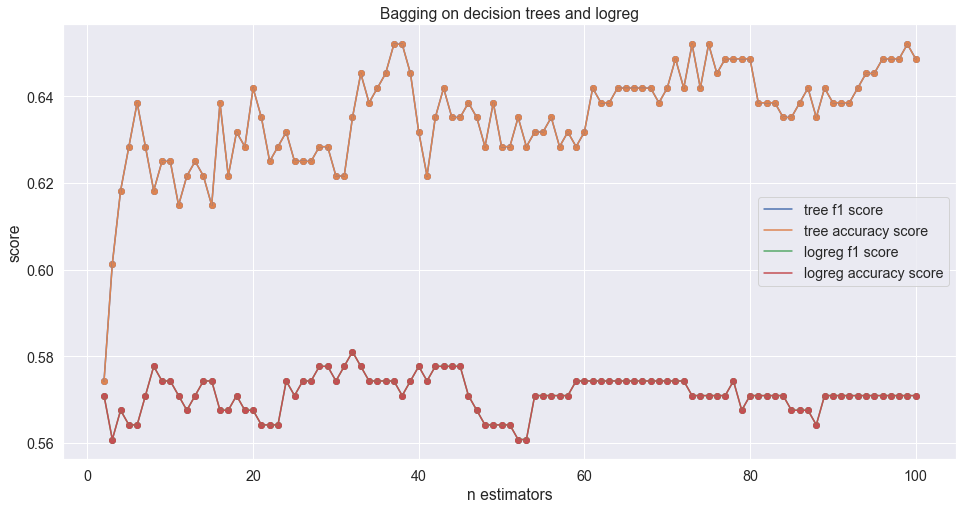

In [1464]:
# plot f1 and accuracy w.r.t. the size of esemble
fig, _ = plt.subplots(figsize=[16, 8])

plt.scatter(N_estimators, tree_f1_score)
plt.plot(N_estimators, tree_f1_score, label='tree f1 score')

plt.scatter(N_estimators, tree_accuracy_score)
plt.plot(N_estimators, tree_accuracy_score, label='tree accuracy score')

plt.scatter(N_estimators, logreg_f1_score)
plt.plot(N_estimators, logreg_f1_score, label='logreg f1 score')

plt.scatter(N_estimators, logreg_accuracy_score)
plt.plot(N_estimators, logreg_accuracy_score, label='logreg accuracy score')

plt.title('Bagging on decision trees and logreg')
plt.legend()
plt.xlabel('n estimators')
plt.ylabel('score')

Как можно видеть по графику, бэггинг над моделями линейной регрессии дает более высокую оценку на тестовых данных, чем бэггинг над решающими деревьями.

Оптимальное количество можелей в ансамбле в обоих случаях примерно 70 моделей. После этого количества, оценка ансамбля выходит на плато.

Хотя, в пункте 2.5 мы получили оптимальную глубину дерева 11, в бэггинге имеет смысл использовать большую глубину, так как бэггинг использует переобучение решающих деревьев, как преимущество, а не как недостаток этой модели. По этой причине, в этом пункте, мы не ограничиваем глубину решающего дерева.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Text(0, 0.5, 'score')

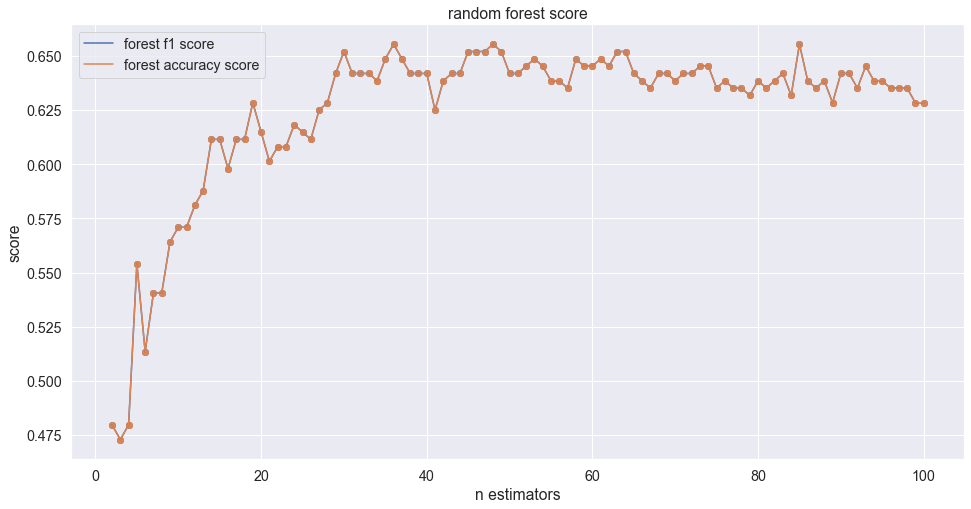

In [1465]:
from sklearn.ensemble import RandomForestClassifier

# Variate RandomForestClassifier with different amount of estimators and plot f1 and accuracy w.r.t. the size of esemble
N_estimators = np.arange(2, 100+1)

forest_f1_score = []
forest_accuracy_score = []
for n in N_estimators:
    clf = RandomForestClassifier(n_estimators=n, random_state=0)
    clf.fit(X_train_pca, y_train)
    prediction = clf.predict(X_test_pca)
    
    ensemble_tree_accuracy_score = accuracy_score(y_test, prediction)
    ensemble_tree_f1_score = f1_score(y_test, prediction, average='micro')

    forest_f1_score.append(ensemble_tree_f1_score)
    forest_accuracy_score.append(ensemble_tree_accuracy_score)

fig, _ = plt.subplots(figsize=[16, 8])

plt.scatter(N_estimators, forest_f1_score)
plt.plot(N_estimators, forest_f1_score, label='forest f1 score')

plt.scatter(N_estimators, forest_accuracy_score)
plt.plot(N_estimators, forest_accuracy_score, label='forest accuracy score')

plt.legend()
plt.title('random forest score')
plt.xlabel('n estimators')
plt.ylabel('score')

Поскольку random forest использует идею не только бэггинга, но и случайного подбора зарактеристик в кажом узле, количество моделей в ансамбле при достижении оптимального результата должно быть меньше по сравнению с обычным бэггингом. Что мы и можем наблюдать на графике. Активный рост оценки и выход на плато происходит при меньшем количестве моделей.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

Text(0, 0.5, 'model score')

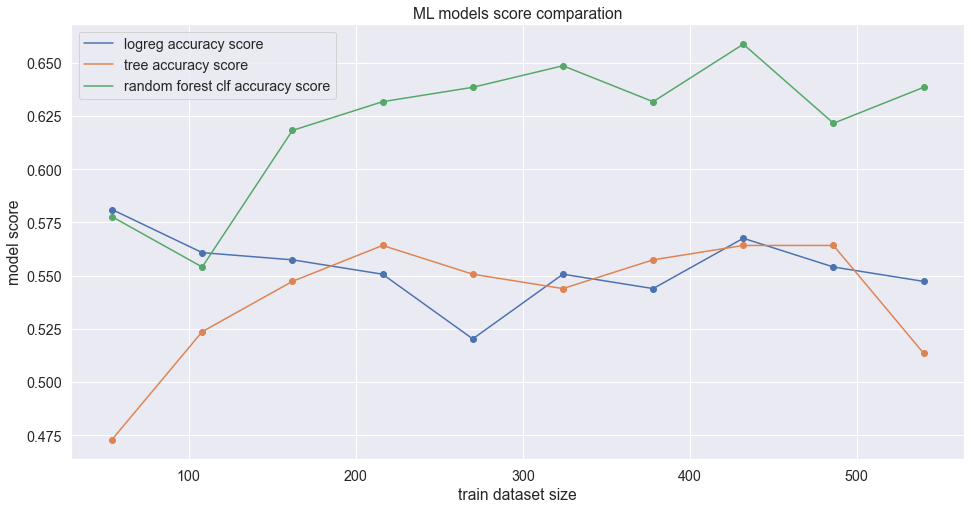

In [1466]:
# Split train data on batches
train_data_list = [X_train_pca[:54*i] for i in range(1, 10+1)]
train_target_list = [y_train[:54*i] for i in range(1, 10+1)]

# Compare all models scores
logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42,
                            C = 10,
                            penalty='l1')

tree_clf = clf = DecisionTreeClassifier(max_depth=11, random_state=0)

random_forest_clf = RandomForestClassifier(n_estimators=60, random_state=0)

logreg_accuracy_score = []
tree_clf_accuracy_score = []
random_forest_clf_accuracy_score = []
for feature_train, target_train in zip(train_data_list, train_target_list):
    # обучаем модели
    logreg.fit(feature_train, target_train)
    tree_clf.fit(feature_train, target_train)
    random_forest_clf.fit(feature_train, target_train)

    # делаем предсказание
    logreg_prediction = logreg.predict(X_test_pca)
    tree_clf_prediction = tree_clf.predict(X_test_pca)
    random_forest_clf_prediction = random_forest_clf.predict(X_test_pca)

    # оцениваем модели
    logreg_accuracy_score.append(accuracy_score(y_test, logreg_prediction))
    tree_clf_accuracy_score.append(accuracy_score(y_test, tree_clf_prediction))
    random_forest_clf_accuracy_score.append(accuracy_score(y_test, random_forest_clf_prediction))

train_el_amnt = range(54, 540+1, 54)

fig, _ = plt.subplots(figsize=[16, 8])

plt.scatter(train_el_amnt, logreg_accuracy_score)
plt.plot(train_el_amnt, logreg_accuracy_score, label='logreg accuracy score')

plt.scatter(train_el_amnt, tree_clf_accuracy_score)
plt.plot(train_el_amnt, tree_clf_accuracy_score, label='tree accuracy score')

plt.scatter(train_el_amnt, random_forest_clf_accuracy_score)
plt.plot(train_el_amnt, random_forest_clf_accuracy_score, label='random forest clf accuracy score')

plt.legend()
plt.title('ML models score comparation')
plt.xlabel('train dataset size')
plt.ylabel('model score')

В данном случае наибольшую эффективность показал случайный лес, так как он не только использует переобучение решающих деревьев как преимущество для достижения оптимального результата, но и метод случайных подпространств над решающими деревьями.

__Заметим, что обучение и тестировани моделей проводилось на PCA выборке.__

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [1467]:
# ! pip install xgboost

In [1468]:
# # YOUR CODE HERE
# import xgboost as xgb

# boost_model = xgb.XGBClassifier(objective='multi:softprob',
#                                 learning_rate=0.1,
#                                 max_depth=1,
#                                 n_estimators=330) # multi:softprob is a xgb objective (loss) multiclass function
# # Fit the model to the training data
# boost_model.fit(X_train, y_train)

# boost_prediction = boost_model.predict(X_test)
# print(f"accuracy score = {accuracy_score(y_test, boost_prediction)}")